# Analysis of Lin Dyke model sensitivity to variations in storm temporal profile

## Description
Analysis of results of running 6hr duration, 1-in-100 year rainfall events through Hec-Ras model of Lin Dyke catchment. These include: the FEH single peak profile; a synthetic replication of the FEH single peak profile; and three variations of methods for splitting the single peak over three peaks.

## Overview of conclusions
TO DO

In [2]:
import os
from pathlib import Path
from PIL import Image
# import geopandas as gpd
import itertools
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

from my_functions_syntheticprofiles import *

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define whether to filter out values <0.1
remove_little_values = True

model_directory = '../../../../FloodModelling/MeganModel_New/'

### Plot the clusters

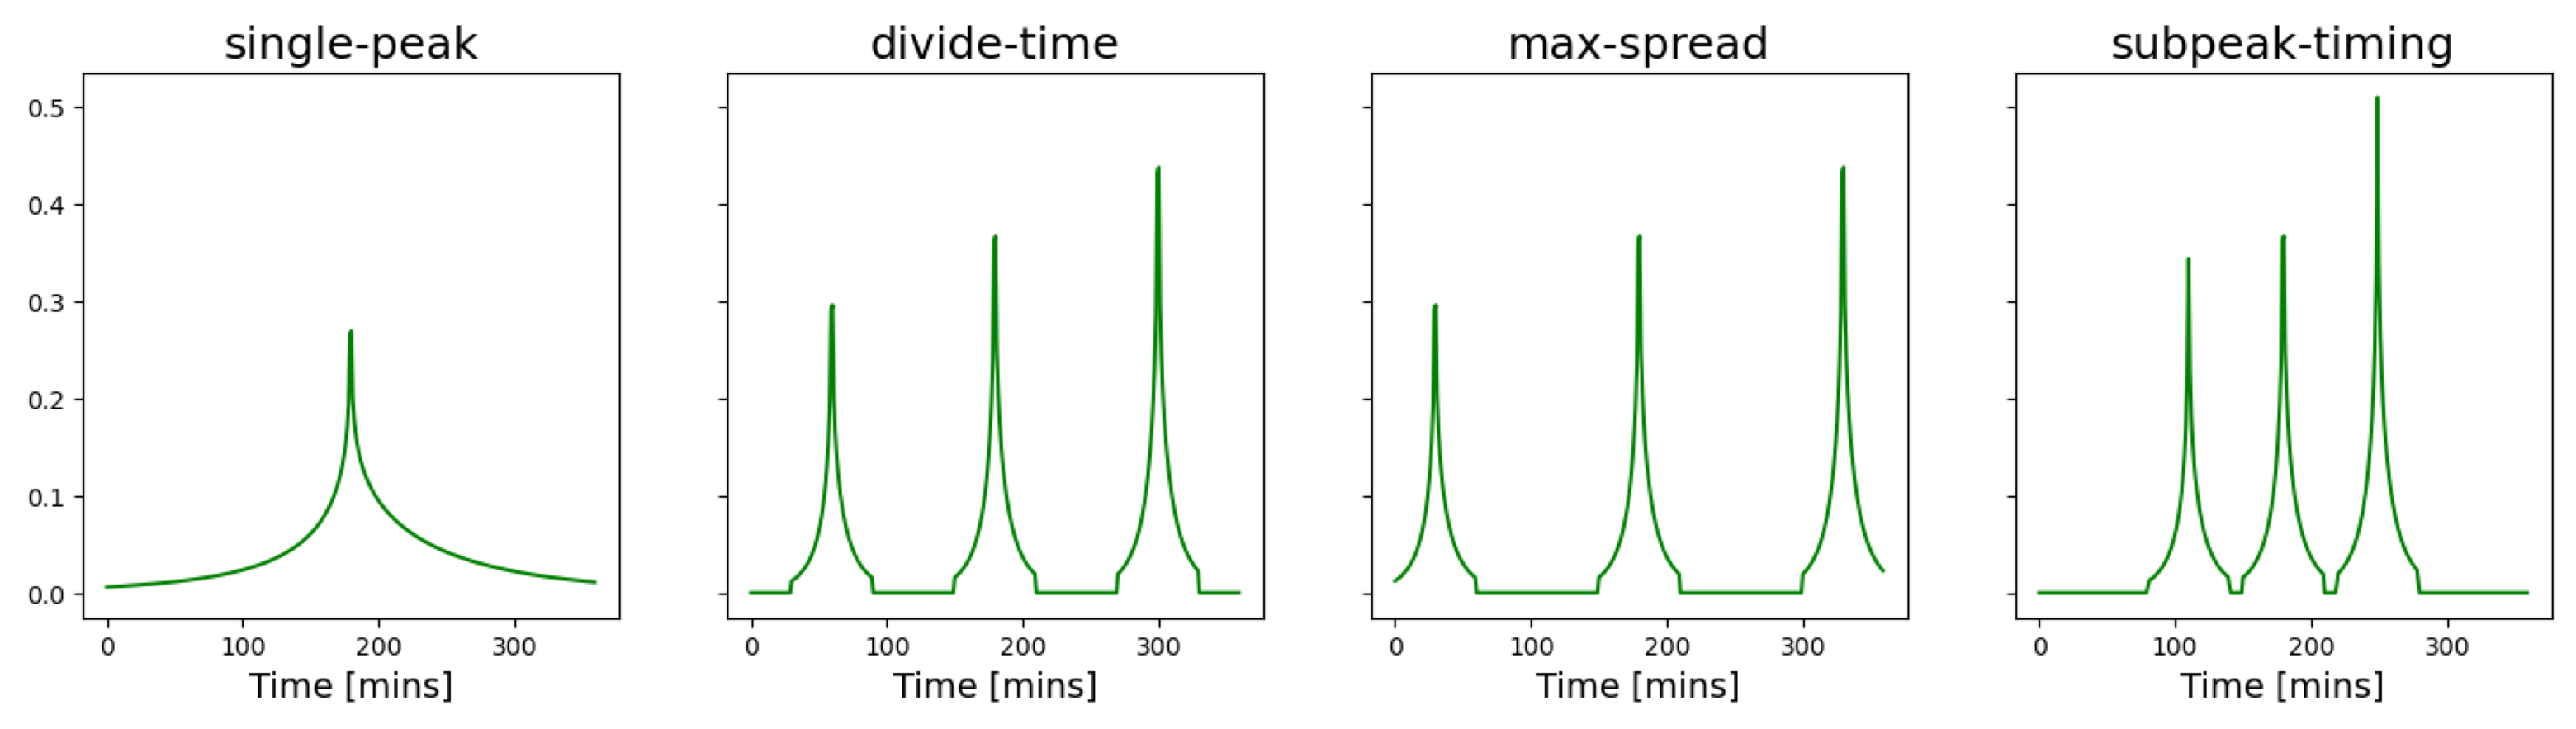

In [5]:
fig,ax =plt.subplots(figsize=(40,20))
img = Image.open("../../CreateSyntheticRainfallEvents/SyntheticProfiles/6hr_100yrRP/PostLossRemoval/multipeaked_scenarios.png")
plt.axis('off')
plt.imshow(img);

### Define the names of the method (shorter and longer versions)

In [6]:
short_ids = ['6h_feh_sp', '6h_sp', '6h_dt', '6h_spt', '6h_ms']   
methods = ['6h_feh_single-peak','6h_single-peak', '6h_divide-time', '6h_subpeak-timing', '6h_max-spread']  

# Ordered by the minute of the max rainfall intensity and the max intensity (copied from Processing-2.ipynb)
short_ids_by_loading = ['6h_feh_sp', '6h_sp', '6h_spt', '6h_dt', '6h_ms']
short_ids_by_intensity = ['6h_feh_sp', '6h_spt', '6h_dt', '6h_ms', '6h_sp']

### Read in summary results from Processing-2.ipynb script

In [7]:
cluster_results= pd.read_csv("Data/allclusters_summary.csv")
cluster_results['color'] = ['black', 'gold', 'darkred', 'cadetblue', 'darksalmon']

# Relationship between the number of flooded cells in urban and non-urban areas

27% of the catchment is classified as either urban or semi-urban.     
Changes to the extent, depth and velocity of flooding in these areas are the most important.  
Therefore, it is important to determine whether any of the rainfall scenarios result in a greater proportion of the flooding taking part in these urban areas.  

The plots below show:
* The relationship between the flooded area and the urban flooded area. There is a fairly consistent relationship across all the scenarios, with between 34% of the flooding being in urban areas in all cases. 
* The relationship between the percentage difference in flooded area between each scenario and the FEH single peak scenario in urban and non urban areas. This is also fairly consistent across the scenarios

In [5]:
# cluster_results['UrbanFloodedArea'] /cluster_results['TotalFloodedArea'] 

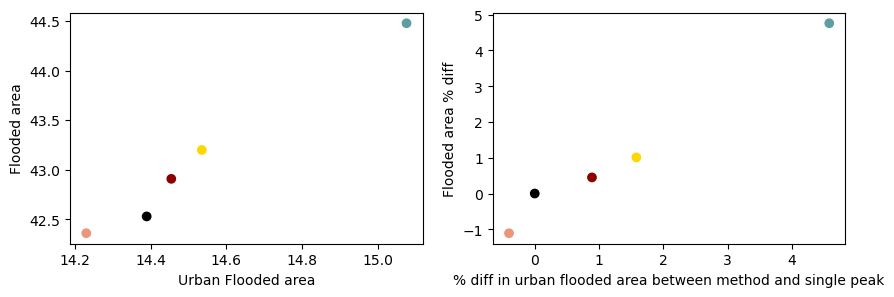

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (10,3))
# The urban flooded area as a percentage of the total area 
axs[0].scatter(cluster_results['UrbanFloodedArea'], cluster_results['TotalFloodedArea'], color =cluster_results['color'])
axs[0].set_xlabel('Urban Flooded area')
axs[0].set_ylabel('Flooded area')
# (cluster_results['UrbanFloodedArea']/cluster_results['TotalFloodedArea'])*100
# The difference between the flooded area from a method and single peak 
axs[1].scatter(cluster_results['%Diff_FloodedArea_fromSP'], cluster_results['%Diff_UrbanFloodedArea_fromSP'],
              color = cluster_results['color'])
axs[1].set_xlabel('% diff in urban flooded area between method and single peak')
axs[1].set_ylabel('Flooded area % diff');

# Relationship between the total flooded area & the rainfall scenario used
One difference that might be expected to arise from the use of different rainfall scenarios is a difference in the total area which is flooded.  

The plots below display the total flooded area generated by each of the rainfall scenarios, and the percentage difference between each scenario and the FEH single peak scenario.  
*  In the first row of plots, the scenarios are ordered by the minute at which the maximum rainfall intensity occurs, with the most front loaded profiles towards the left. 
*  In the second row, the scenarios are ordered by the maximum rainfall intensity, with the scenarios with the highest intensities on the left. 

This shows that there is variation in the total flooded area, with the extremes being one scenario having 4.5% more, and another having 0.4% less flooded area than the FEH single peak scenario. 

In [9]:
cluster_results['%Diff_FloodedArea_fromSP_formatted']=cluster_results['%Diff_FloodedArea_fromSP_formatted'].fillna('')

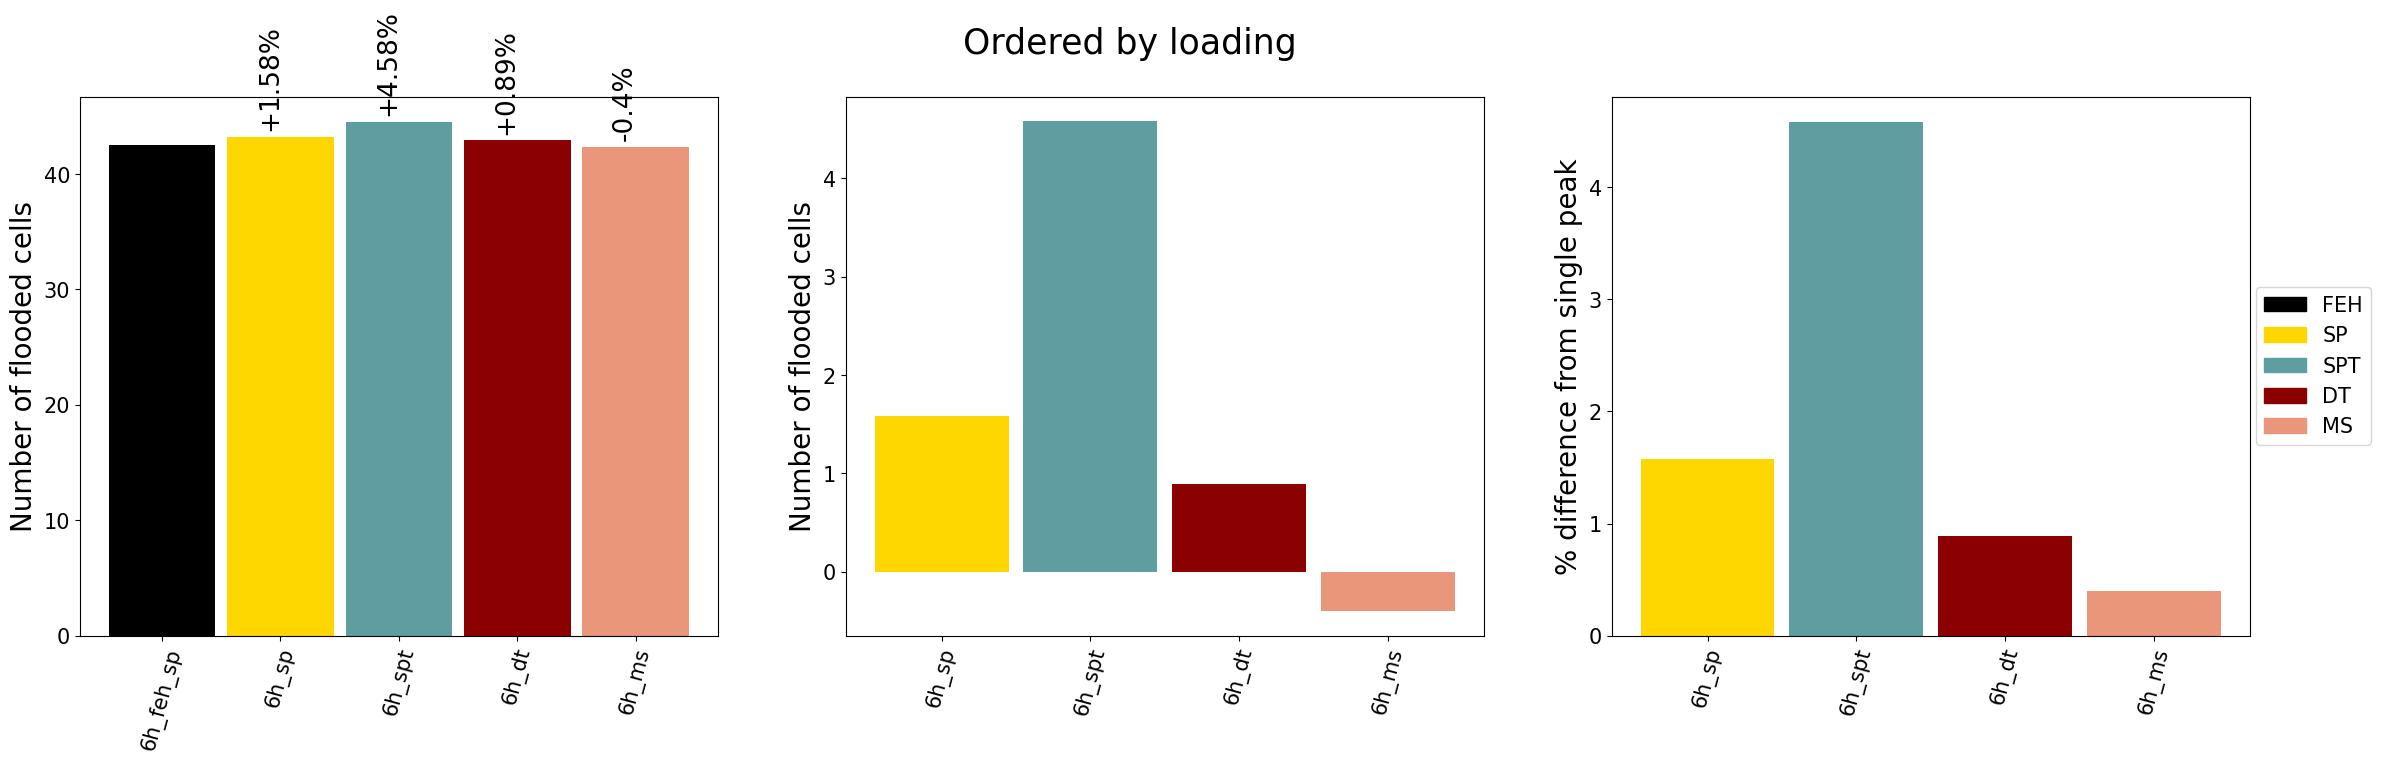

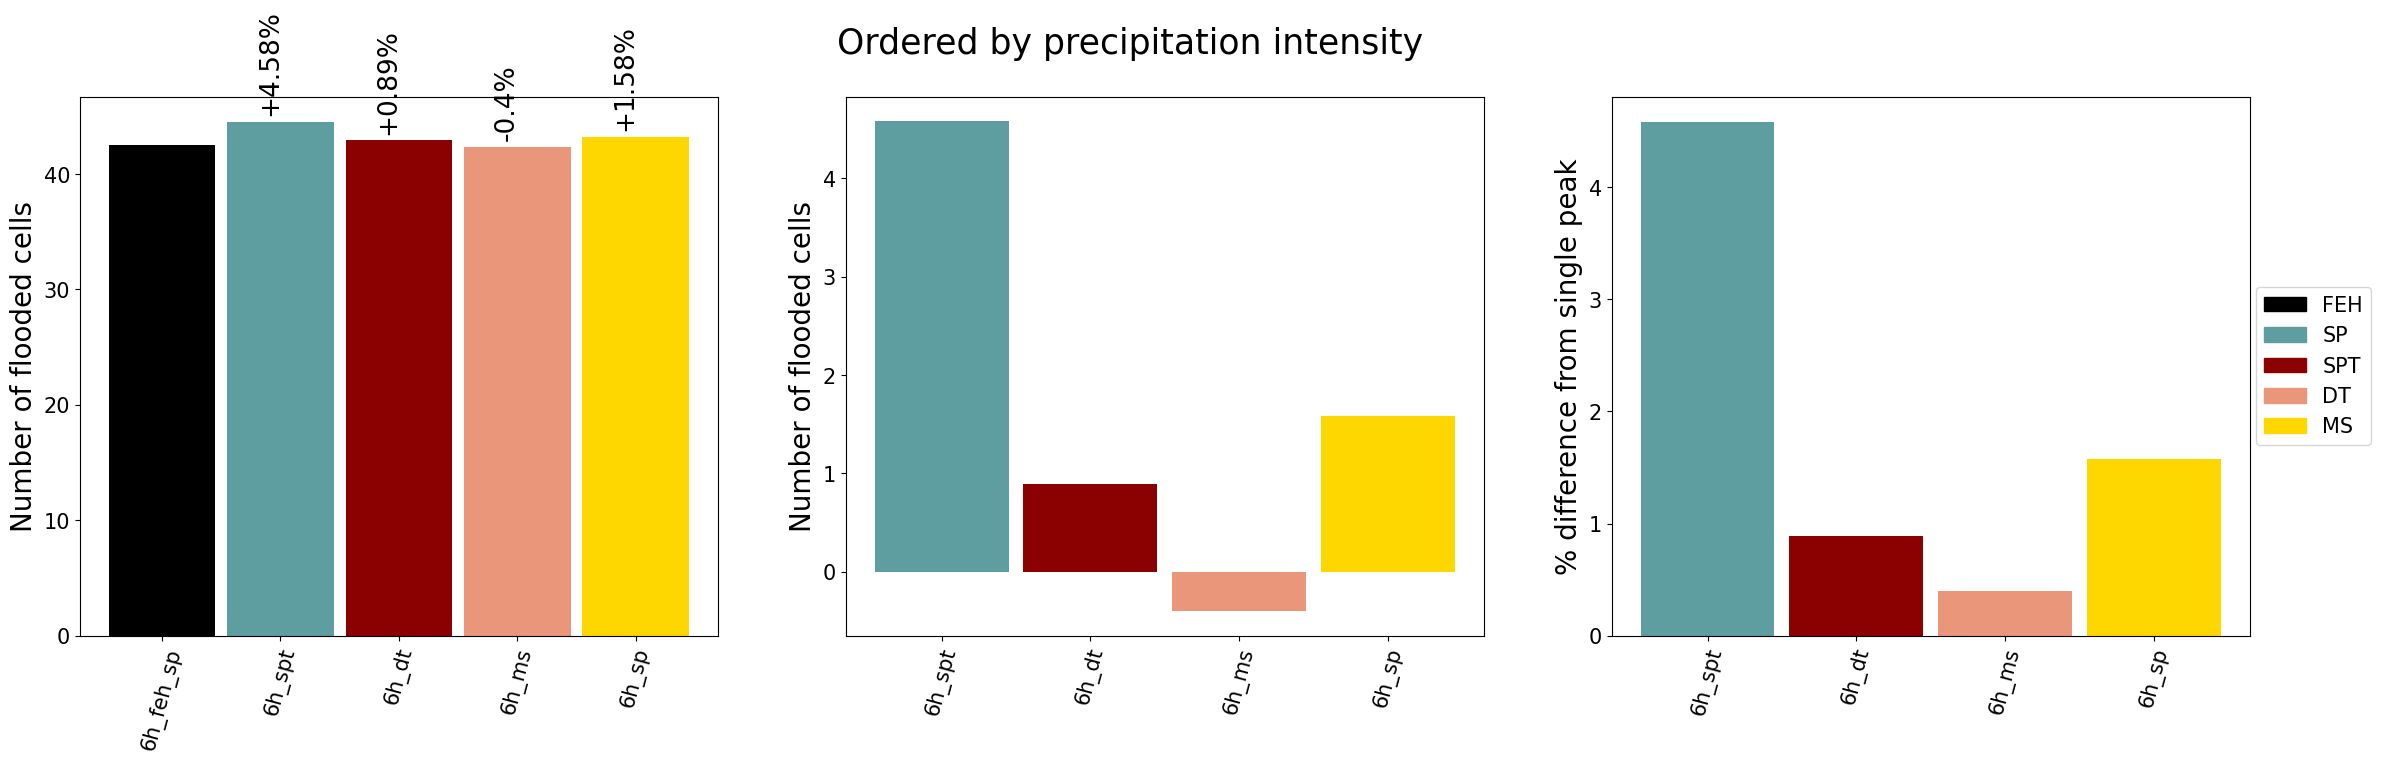

In [10]:
plot_totals(cluster_results, short_ids_by_loading, 'Ordered by loading')
plot_totals(cluster_results, short_ids_by_intensity, 'Ordered by precipitation intensity')

### Plot the maximum peak intensity value, and the minute of max intensity against the flooded area

The relationship between the total flooded area and both the peak intensity and the minute of the peak intensity are also plotted for each scenario.

Neither the relationship between the total flooded area and the magnitude of peak intensity or the minute of the peak intensity are significant (but only 4 samples?)

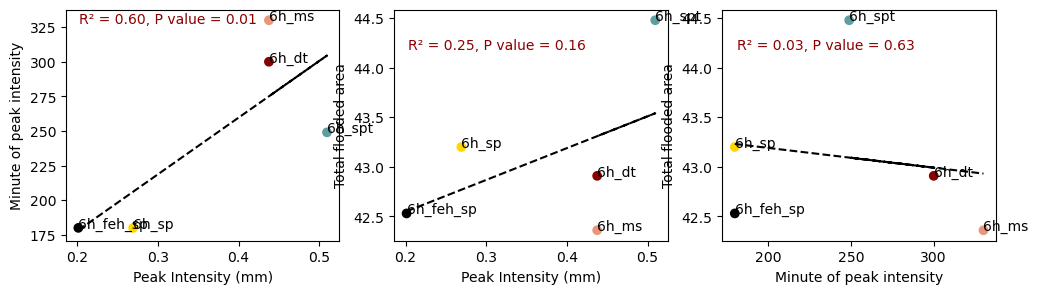

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (12,3))
scatter_plot_with_trend_line(axs[0], short_ids, cluster_results['MaxRainfallIntensity'], cluster_results['MaxRainfallIntensityMinute'], 'Peak Intensity (mm)' , 'Minute of peak intensity', cluster_results['color'], add_r2 = True)
scatter_plot_with_trend_line(axs[1], short_ids, cluster_results['MaxRainfallIntensity'], cluster_results['TotalFloodedArea'], 'Peak Intensity (mm)' , 'Total flooded area', cluster_results['color'], add_r2 = True)
scatter_plot_with_trend_line(axs[2], short_ids, cluster_results['MaxRainfallIntensityMinute'], cluster_results['TotalFloodedArea'], 'Minute of peak intensity' , 'Total flooded area',cluster_results['color'], add_r2 = True)

# Relationship between flood severity & the rainfall scenario used
In addition to the difference which rainfall scenarios make to the total area which is flooded, it is also possible that the scenarios could influence the severity of the flooding in terms of the depth, velocity or hazard associated with the flooding.

In [12]:
velocity_props  =  reformat_counts_and_props(cluster_results, ['<=0.25m/s_propcells','0.25-0.5m/s_propcells', '0.5-2m/s_propcells', '>2m/s_propcells'], short_ids)        
velocity_props_urban  =  reformat_counts_and_props(cluster_results, ['<=0.25m/s_propcells_urban','0.25-0.5m/s_propcells_urban', '0.5-2m/s_propcells_urban', '>2m/s_propcells_urban'], short_ids)      
velocity_counts  =  reformat_counts_and_props(cluster_results, ['<=0.25m/s_countcells','0.25-0.5m/s_countcells', '0.5-2m/s_countcells', '>2m/s_countcells'], short_ids)             
velocity_counts_urban  =  reformat_counts_and_props(cluster_results, ['<=0.25m/s_countcells_urban','0.25-0.5m/s_countcells_urban', '0.5-2m/s_countcells_urban', '>2m/s_countcells_urban'], short_ids)      

depth_props  =  reformat_counts_and_props(cluster_results, ['<=0.3m_propcells','0.3-0.6m_propcells', '0.6-1.2m_propcells', '>1.2m_propcells'], short_ids)              
depth_props_urban  =  reformat_counts_and_props(cluster_results, ['<=0.3m_propcells_urban','0.3-0.6m_propcells_urban', '0.6-1.2m_propcells_urban', '>1.2m_propcells_urban'], short_ids)      
depth_counts  =  reformat_counts_and_props(cluster_results, ['<=0.3m_countcells','0.3-0.6m_countcells', '0.6-1.2m_countcells', '>1.2m_countcells'], short_ids)      
depth_counts_urban  =  reformat_counts_and_props(cluster_results, ['<=0.3m_countcells_urban','0.3-0.6m_countcells_urban', '0.6-1.2m_countcells_urban', '>1.2m_countcells_urban'], short_ids)      

hazard_counts =  reformat_counts_and_props(cluster_results, ['Low hazard_numcells','Moderate hazard_numcells', 'Significant hazard_numcells','Extreme hazard_numcells'], short_ids)      
hazard_props =  reformat_counts_and_props(cluster_results, ['Low hazard_propcells','Moderate hazard_propcells', 'Significant hazard_propcells','Extreme hazard_propcells'], short_ids)      
hazard_catchange_counts = reformat_counts_and_props(cluster_results, ['Hazard_3CatsLower_countcells', 'Hazard_2CatsLower_countcells', 'Hazard_1CatsLower_countcells', 'Hazard_SameCat_countcells', 'Hazard_1CatsHigher_countcells','Hazard_2CatsHigher_countcells'], short_ids)      
hazard_catchange_props = reformat_counts_and_props(cluster_results, ['Hazard_3CatsLower_propcells','Hazard_2CatsLower_propcells', 'Hazard_1CatsLower_propcells', 'Hazard_SameCat_propcells', 'Hazard_1CatsHigher_propcells', 'Hazard_2CatsHigher_propcells'], short_ids)      

### Create dataframes summarising the number of cells with different depth values (rather than just in categories)

In [15]:
cluster_results

,Cluster_num,MaxRainfallIntensity,MaxRainfallIntensityMinute,TotalFloodedArea,%Diff_FloodedArea_fromSP,%Diff_FloodedArea_fromSP_formatted,Abs%Diff_FloodedArea_fromSP,UrbanFloodedArea,%Diff_UrbanFloodedArea_fromSP,%Diff_UrbanFloodedArea_fromSP_formatted,...,Hazard_SameCat_countcells,Hazard_1CatsHigher_countcells,Hazard_2CatsHigher_countcells,Hazard_3CatsLower_propcells,Hazard_2CatsLower_propcells,Hazard_1CatsLower_propcells,Hazard_SameCat_propcells,Hazard_1CatsHigher_propcells,Hazard_2CatsHigher_propcells,color
0,6h_feh_sp,0.201255,180,42.528600,0.00,,0.00,14.389875,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,black
1,6h_sp,0.269191,180,43.198800,1.58,+1.58%,1.58,14.535100,1.01,+1.01%,...,1675916.0,110.0,4.0,NaN,0.0,1.5,98.5,0.0,0.0,gold
2,6h_dt,0.437572,300,42.907775,0.89,+0.89%,0.89,14.454725,0.45,+0.45%,...,1629351.0,23091.0,638.0,0.0,0.0,1.7,96.9,1.4,0.0,darkred
3,6h_spt,0.509581,249,44.477575,4.58,+4.58%,4.58,15.074525,4.76,+4.76%,...,1614503.0,706.0,15.0,0.0,0.1,4.9,95.0,0.0,0.0,cadetblue
4,6h_ms,0.437572,330,42.359150,-0.40,-0.4%,0.40,14.230775,-1.11,-1.11%,...,1587239.0,52889.0,2144.0,0.0,0.0,1.4,95.3,3.2,0.1,darksalmon


In [17]:
# For each method, read in the raster, round the values to X decimal places,
# And count the number of each unique value
# Store all these values in one dataframe (column for each method)
summary_df_permutated = pd.DataFrame()
for method_num, short_id in enumerate(short_ids):
    # Filepath
    fp = model_directory + "{}/{} (Max).Resampled.Terrain.tif".format(short_id, '{}')
    # Read raster
    raster = prepare_rainfall_scenario_raster(fp.format('Velocity'), remove_little_values)[0]
    raster_rounded = np.around(raster, decimals=1)
    # Count number of each value 
    raster_rounded = raster_rounded.flatten()[np.logical_not(np.isnan(raster_rounded.flatten()))]
    unique, counts = np.unique(raster_rounded, return_counts=True)
    
    # Create version of df where each column contains the count associated with each depth value
    if method_num == 0:
        summary_df = pd.DataFrame({'values': unique, 'counts_{}'.format(short_id):counts})
    else:
        this_df = pd.DataFrame({'values': unique, 'counts_{}'.format(short_id):counts})                         
        summary_df = pd.merge(summary_df,this_df,on='values',how='outer')
    
    #
    this_df_permutated = pd.DataFrame({'values': unique, 'counts' :counts,
                          'short_id':short_id, 'present': 1})   
    summary_df_permutated = pd.concat([summary_df_permutated, this_df_permutated], ignore_index=True)
    
# Check that the total number of cells for different scenarios is different (as we would expect)
# summary_df.loc['Total']= summary_df.sum()
# plt.bar(short_ids,summary_df.sum()[1:].values)
# plt.xticks(rotation=90);    

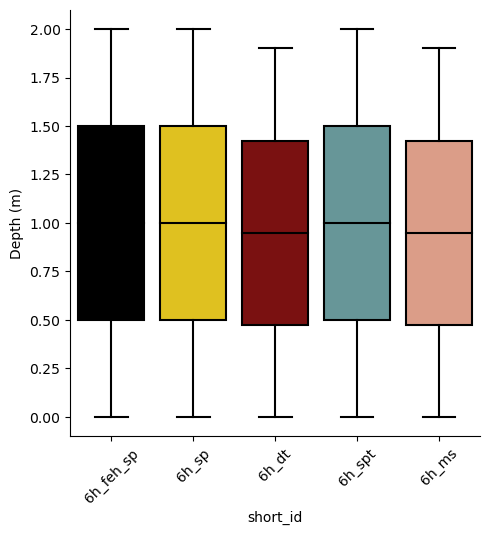

In [22]:
sns.catplot(data=summary_df_permutated, x="short_id", y="values", kind="box", hue= 'short_id', dodge=False, palette = sns.color_palette(['black', 'gold', 'darkred', 'cadetblue', 'darksalmon']))
plt.xticks(rotation=45)
plt.ylabel('Depth (m)');

### Plot the proportion of the total flooded cells in various depth/velocity/hazard categories
To test whether any of the scenarios lead to more severe flooding outcomes (within the same flooded extent)

The plots below display the proportion of the total flooded area which is in each depth/velocity/hazard category, generated by each of the rainfall scenarios. 
*  In the first row of plots, the scenarios are ordered by the minute at which the maximum rainfall intensity occurs, with the most front loaded profiles towards the left. 
*  In the second row, the scenarios are ordered by the maximum rainfall intensity, with the scenarios with the highest intensities on the left. 

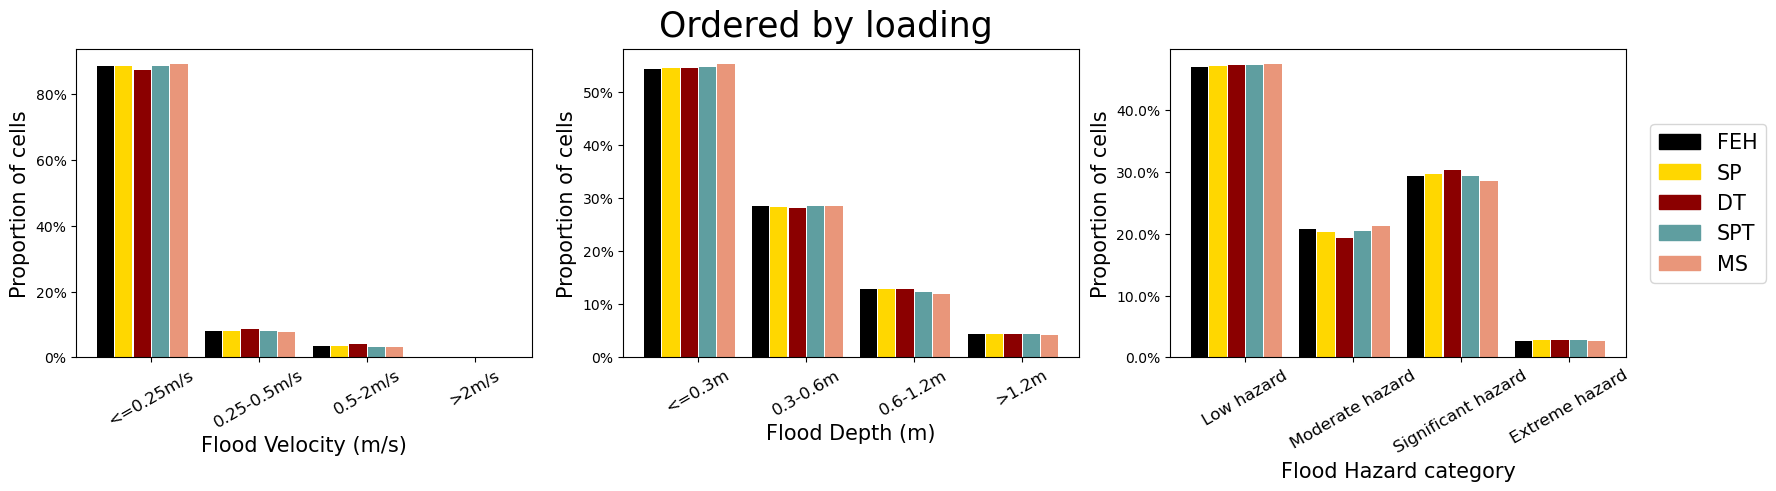

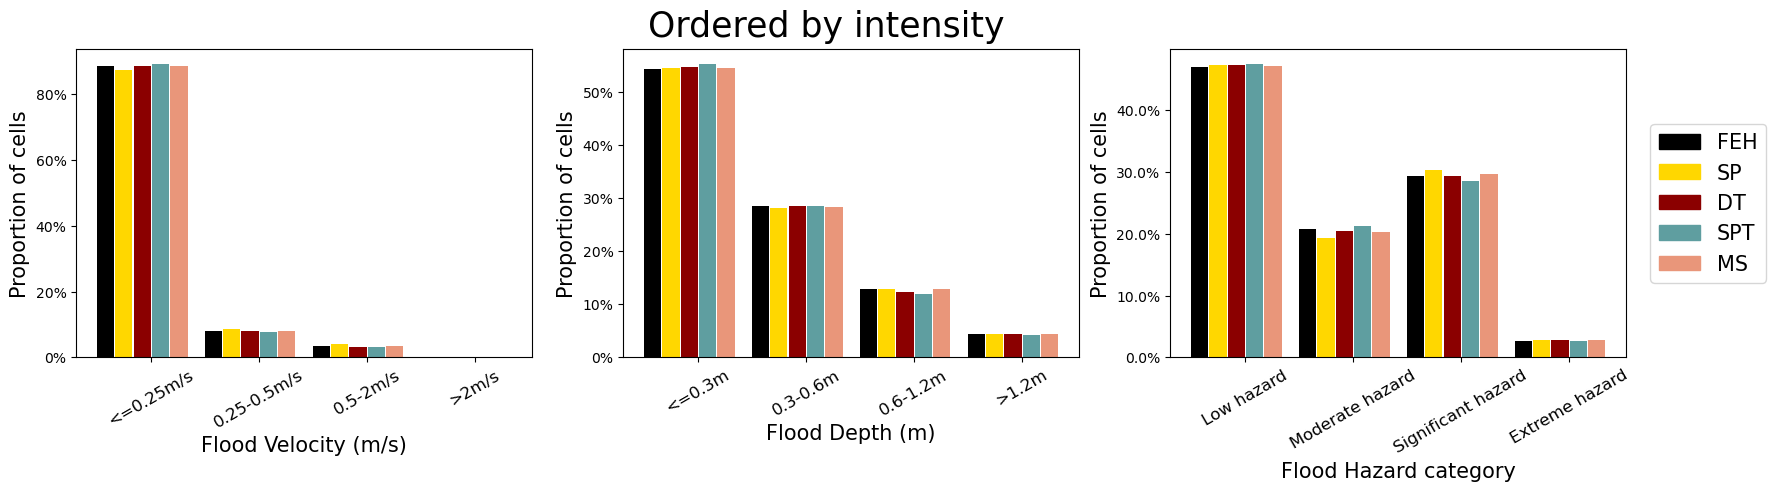

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (20,4))
bar_plot_props(fig, axs[0],velocity_props, 'Velocity (m/s)',short_ids_by_loading,  'Ordered by loading',  cluster_results['color'])
bar_plot_props(fig, axs[1], depth_props, 'Depth (m)', short_ids_by_loading, 'Ordered by loading',  cluster_results['color'])
bar_plot_props(fig, axs[2], hazard_props, 'Hazard category', short_ids_by_loading, 'Ordered by loading',  cluster_results['color'])

fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (20,4))  
bar_plot_props(fig, axs[0],velocity_props, 'Velocity (m/s)',short_ids_by_intensity, 'Ordered by intensity',  cluster_results['color'])
bar_plot_props(fig, axs[1], depth_props, 'Depth (m)', short_ids_by_intensity, 'Ordered by intensity',  cluster_results['color'])
bar_plot_props(fig, axs[2], hazard_props, 'Hazard category', short_ids_by_intensity, 'Ordered by intensity',  cluster_results['color'])

### Plot the maximum peak intensity value against the flooded area

The relationship between the proportion of flooded cells in various depth/velocity/hazard categories and both the peak intensity and the minute of the peak intensity are also plotted for each scenario.

There is a positive significant relationship between the minute of peak intensity and the proportion of flooded cells in the lowest depth category.

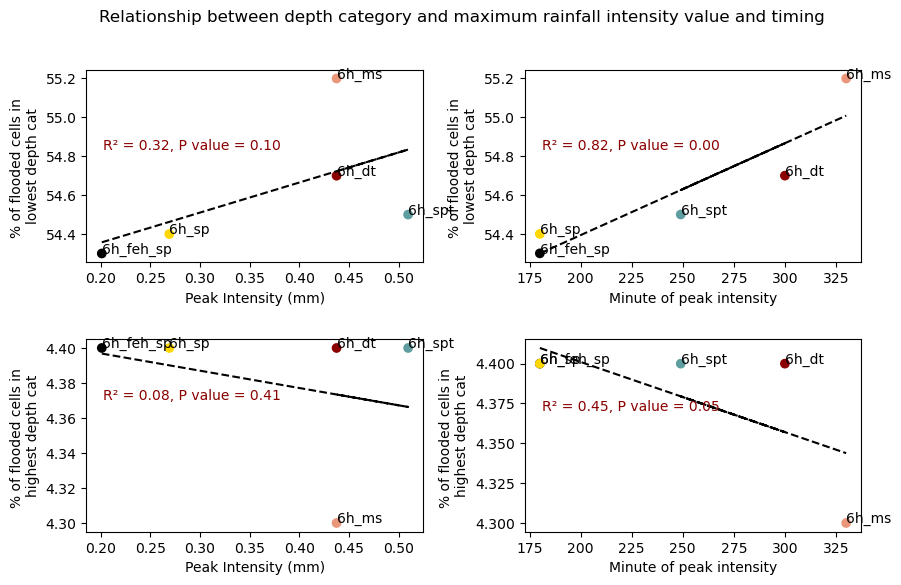

In [15]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (10,6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.4)
scatter_plot_with_trend_line(axs[0,0], short_ids, cluster_results['MaxRainfallIntensity'], cluster_results['<=0.3m_propcells'], 'Peak Intensity (mm)' , '% of flooded cells in \nlowest depth cat',cluster_results['color'],  add_r2 = True)
scatter_plot_with_trend_line(axs[0,1], short_ids, cluster_results['MaxRainfallIntensityMinute'], cluster_results['<=0.3m_propcells'], 'Minute of peak intensity' , '% of flooded cells in \nlowest depth cat',cluster_results['color'],  add_r2 = True)

scatter_plot_with_trend_line(axs[1,0], short_ids, cluster_results['MaxRainfallIntensity'], cluster_results['>1.2m_propcells'], 'Peak Intensity (mm)' , '% of flooded cells in \nhighest depth cat', cluster_results['color'], add_r2 = True)
scatter_plot_with_trend_line(axs[1,1], short_ids, cluster_results['MaxRainfallIntensityMinute'], cluster_results['>1.2m_propcells'], 'Minute of peak intensity' , '% of flooded cells in \nhighest depth cat', cluster_results['color'], add_r2 = True)

fig.suptitle("Relationship between depth category and maximum rainfall intensity value and timing");

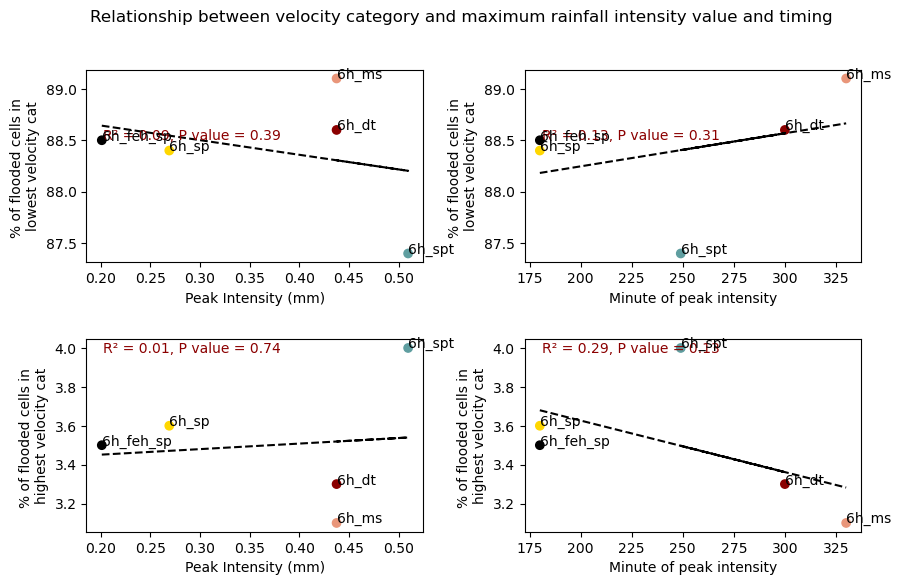

In [16]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (10,6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.4)
scatter_plot_with_trend_line(axs[0,0], short_ids, cluster_results['MaxRainfallIntensity'], cluster_results['<=0.25m/s_propcells'], 'Peak Intensity (mm)' , '% of flooded cells in \nlowest velocity cat', cluster_results['color'], add_r2 = True)
scatter_plot_with_trend_line(axs[0,1], short_ids, cluster_results['MaxRainfallIntensityMinute'], cluster_results['<=0.25m/s_propcells'], 'Minute of peak intensity' , '% of flooded cells in \nlowest velocity cat', cluster_results['color'], add_r2 = True)

scatter_plot_with_trend_line(axs[1,0], short_ids, cluster_results['MaxRainfallIntensity'], cluster_results['0.5-2m/s_propcells'], 'Peak Intensity (mm)' , '% of flooded cells in \nhighest velocity cat',cluster_results['color'],  add_r2 = True)
scatter_plot_with_trend_line(axs[1,1], short_ids, cluster_results['MaxRainfallIntensityMinute'], cluster_results['0.5-2m/s_propcells'], 'Minute of peak intensity' , '% of flooded cells in \nhighest velocity cat',cluster_results['color'],  add_r2 = True)

fig.suptitle("Relationship between velocity category and maximum rainfall intensity value and timing");

### Relationship between hazard and maximum rainfall intensity value and timing

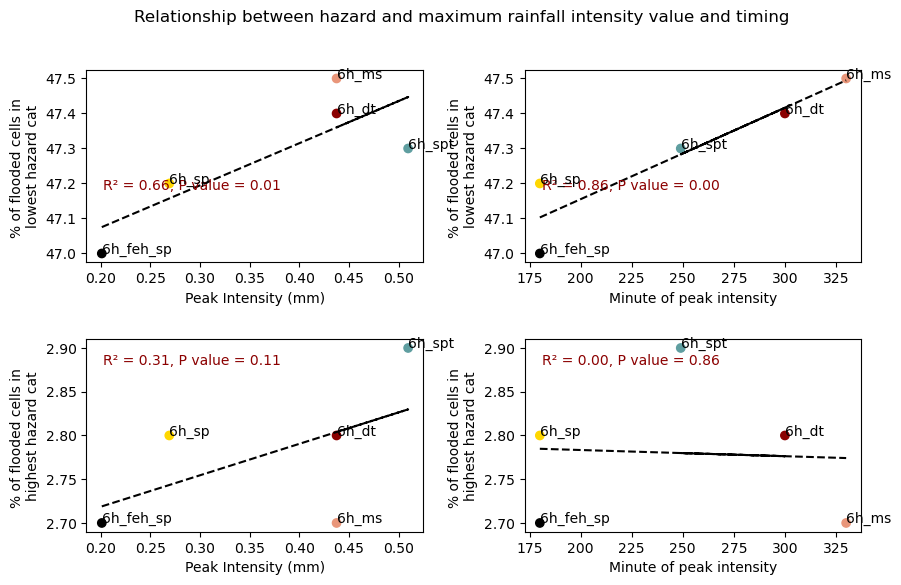

In [18]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (10,6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.4)
scatter_plot_with_trend_line(axs[0,0], short_ids, cluster_results['MaxRainfallIntensity'], cluster_results['Low hazard_propcells'], 'Peak Intensity (mm)' , '% of flooded cells in \nlowest hazard cat',cluster_results['color'],  add_r2 = True)
scatter_plot_with_trend_line(axs[0,1], short_ids, cluster_results['MaxRainfallIntensityMinute'], cluster_results['Low hazard_propcells'], 'Minute of peak intensity' , '% of flooded cells in \nlowest hazard cat',cluster_results['color'],  add_r2 = True)

scatter_plot_with_trend_line(axs[1,0], short_ids, cluster_results['MaxRainfallIntensity'], cluster_results['Extreme hazard_propcells'], 'Peak Intensity (mm)' , '% of flooded cells in \nhighest hazard cat', cluster_results['color'], add_r2 = True)
scatter_plot_with_trend_line(axs[1,1], short_ids, cluster_results['MaxRainfallIntensityMinute'], cluster_results['Extreme hazard_propcells'], 'Minute of peak intensity' , '% of flooded cells in \nhighest hazard cat', cluster_results['color'], add_r2 = True)

fig.suptitle("Relationship between hazard and maximum rainfall intensity value and timing");

## Method leading to deepest/fastest flooding in each cell

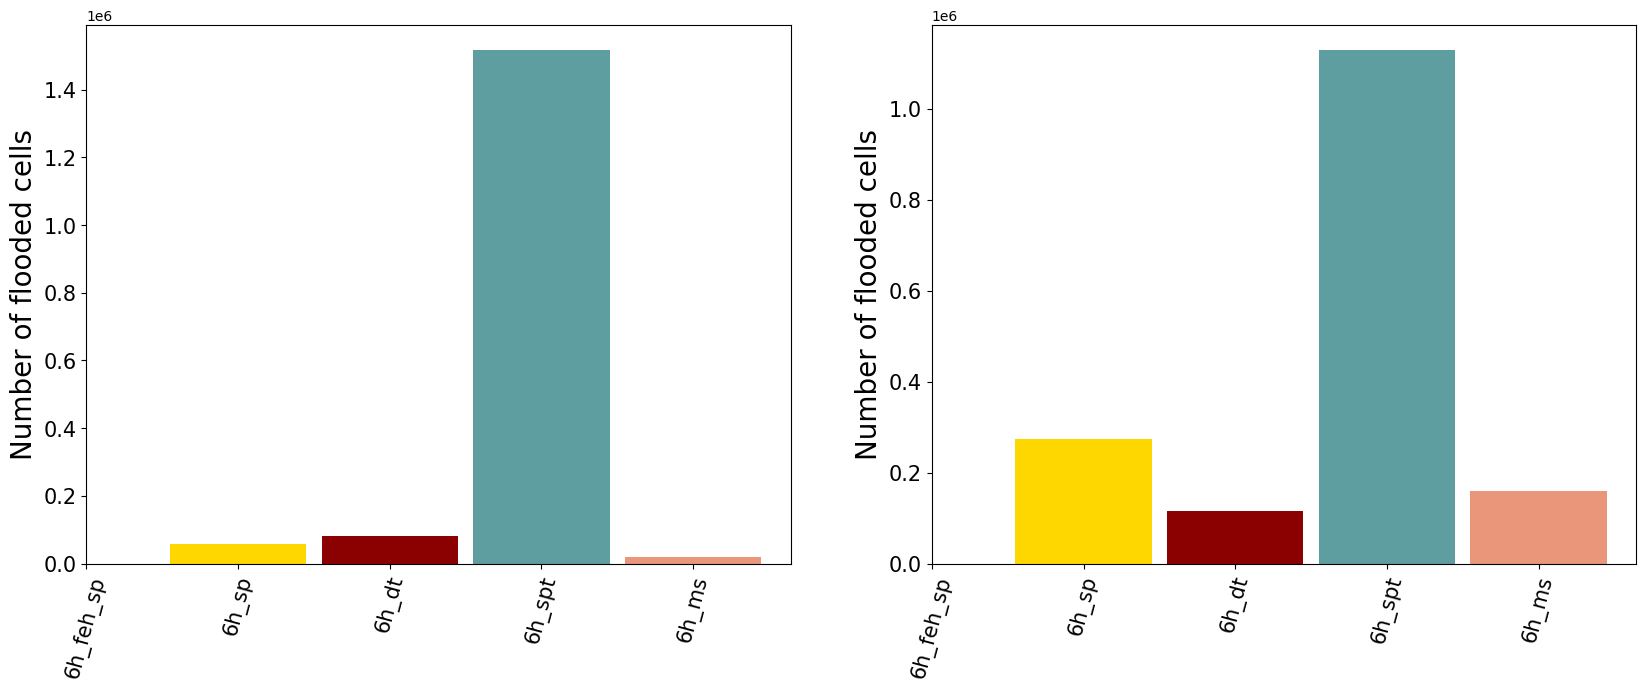

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (20,7))  
plot_worst_case_bars(axs[0], cluster_results, short_ids, 'WorstCaseDepth_ncells')
plot_worst_case_bars(axs[1], cluster_results,  short_ids,'WorstCaseVelocity_ncells')